In [118]:
#importing libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import plotly.express as px
import pickle
import joblib

In [115]:
dataset = pd.read_csv('Crimes_2001_to_Present.csv',low_memory=False)
 
dataset = dataset.head(300000)

In [119]:
num_rows = dataset.shape[0]
num_rows

300000

In [120]:
dataset.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [121]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['IUCR','Case Number','Description','FBI Code','Updated On','Block'])

In [6]:
# X.shape
print('Columns in dataset: ', dataset.columns)

Columns in dataset:  Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [7]:
dataset 

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,NaN,NaN,2018,NaN,NaN,NaN
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439866,12544304,11/09/2021 12:00:00 AM,CRIMINAL DAMAGE,APARTMENT,False,False,333,3.0,5.0,43.0,NaN,NaN,2021,NaN,NaN,NaN
7439867,12541735,11/12/2021 12:00:00 PM,DECEPTIVE PRACTICE,BANK,False,False,234,2.0,5.0,41.0,1188192.0,1869014.0,2021,41.795654,-87.585421,"(41.795653987, -87.585420533)"
7439868,12539777,11/12/2021 07:30:00 PM,BURGLARY,CONVENIENCE STORE,False,False,1524,15.0,37.0,25.0,1139929.0,1906134.0,2021,41.898533,-87.761498,"(41.898532573, -87.76149836)"
7439869,12539285,11/12/2021 04:42:00 PM,PUBLIC PEACE VIOLATION,APARTMENT,False,False,1833,18.0,2.0,8.0,1177292.0,1905664.0,2021,41.896477,-87.624281,"(41.896477499, -87.62428125)"


In [9]:
# # count the number of rows that contain missing values:
# missing_values = dataset.isna().any(axis=1).sum()
# # droping the null value enteries 
# dropping_null_values = dataset.dropna(inplace=True) #check each column wise (if possible try to fill based on the column importance)
# # counts after removal of null values from dataset
# remaining_after_drop_null = np.count_nonzero(dataset.isnull())
# print(missing_values, dropping_null_values, remaining_after_drop_null)
# dataset
# # Before removing Null values 1048575

# # After removing Null value 1015247

# # Total Null values removed 33328

In [8]:
# count the number of rows that contain missing values:
missing_values_before = dataset.isna().any(axis=1).sum()

# Fill missing values based on column importance (customize this logic)
def fill_missing_values(df):
    for column in df.columns:
        if df[column].isnull().any():
            # Check the data type of the column
            if pd.api.types.is_numeric_dtype(df[column]):
                # For numeric columns, fill with mean
                df[column].fillna(df[column].mean(), inplace=True)
            elif pd.api.types.is_bool_dtype(df[column]):
                # For boolean columns, fill with the most common value (mode)
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                # For other columns, you might want to use a different strategy
                # Here, we use the most common value (mode) for non-numeric columns
                df[column].fillna(df[column].mode()[0], inplace=True)

fill_missing_values(dataset)

# counts after handling missing values based on column importance
remaining_after_fill = np.count_nonzero(dataset.isnull())

# Display the counts before and after handling missing values
print(f"Number of rows with missing values before: {missing_values_before}")
print(f"Number of remaining missing values after filling: {remaining_after_fill}")


Number of rows with missing values before: 687177
Number of remaining missing values after filling: 0


##### Chicago is bounded by box: 41.6439,-87.9401; 41.9437,-87.5878
##### Source: https://boundingbox.klokantech.com/

In [9]:
dataset.isna().any(axis=1).sum()

0

In [10]:
#exploring location column
dataset['Location']

print('Current rows:', dataset.shape[0])

Current rows: 7439871


In [11]:
print('Rows before removing out of box points:', dataset.shape[0])
dataset = dataset[(((dataset.Latitude >= 41.64) & (dataset.Longitude <= -87.50)) | 
            ((dataset.Latitude <= 41.94) & (dataset.Longitude >= -87.94)))]
print('Rows after removing out of box points:', dataset.shape[0])

Rows before removing out of box points: 7439871
Rows after removing out of box points: 7439755


In [12]:
# Check NaN values in the pivot table
nan_counts = dataset.isnull().sum()

# Display NaN counts for each 'Primary Type'
print("NaN counts for each 'Primary Type':")
print(nan_counts)

# Display total NaN counts
print("\nTotal NaN counts:", nan_counts.sum())

# Combine data from the 'Year' column to investigate NaN values further
combined_data = dataset[['Year', 'Primary Type']]

# Count occurrences for each combination of 'Year' and 'Primary Type'
combined_counts = combined_data.groupby(['Year', 'Primary Type']).size().unstack()

# Display the counts
print("\nCounts for each combination of 'Year' and 'Primary Type':")
print(combined_counts)

NaN counts for each 'Primary Type':
ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

Total NaN counts: 0

Counts for each combination of 'Year' and 'Primary Type':
Primary Type   ARSON  ASSAULT  BATTERY  BURGLARY  \
Year                                               
2001          1010.0  31384.0  93451.0   26013.0   
2002          1032.0  31521.0  94150.0   25623.0   
2003           955.0  29477.0  88379.0   25156.0   
2004           778.0  28850.0  87136.0   24564.0   
2005           691.0  27066.0  83964.0   25503.0   
2006           726.0  25945.0  80666.0   24324.0   
2007           712.0  26313.0  79593.0 

In [13]:
dataFrame = dataset.copy()

data = dataFrame.pivot_table(index='Year', columns='Primary Type', aggfunc='count') #check why we have received NaN values (try with value_counts and combining 
#year data)
print(data)

              Arrest                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Year                                              
2001          1010.0  31384.0  93451.0  26013.0   
2002          1032.0  31521.0  94150.0  25623.0   
2003           955.0  29477.0  88379.0  25156.0   
2004           778.0  28850.0  87136.0  24564.0   
2005           691.0  27066.0  83964.0  25503.0   
2006           726.0  25945.0  80666.0  24324.0   
2007           712.0  26313.0  79593.0  24858.0   
2008           644.0  25448.0  75921.0  26218.0   
2009           616.0  22860.0  68458.0  26767.0   
2010           522.0  21536.0  65399.0  26421.0   
2011           504.0  20411.0  60456.0  26619.0   
2012           469.0  19898.0  59134.0  22845.0   
2013           364.0  17972.0  54002.0  17895.0   
2014           397.0  16902.0  49449.0  14569.0   
2015           453.0  17047.0  48921.0  13184.0   
2016           516.0  18741.0  50297.0  14289.0   
2017           444.0  19306.0  

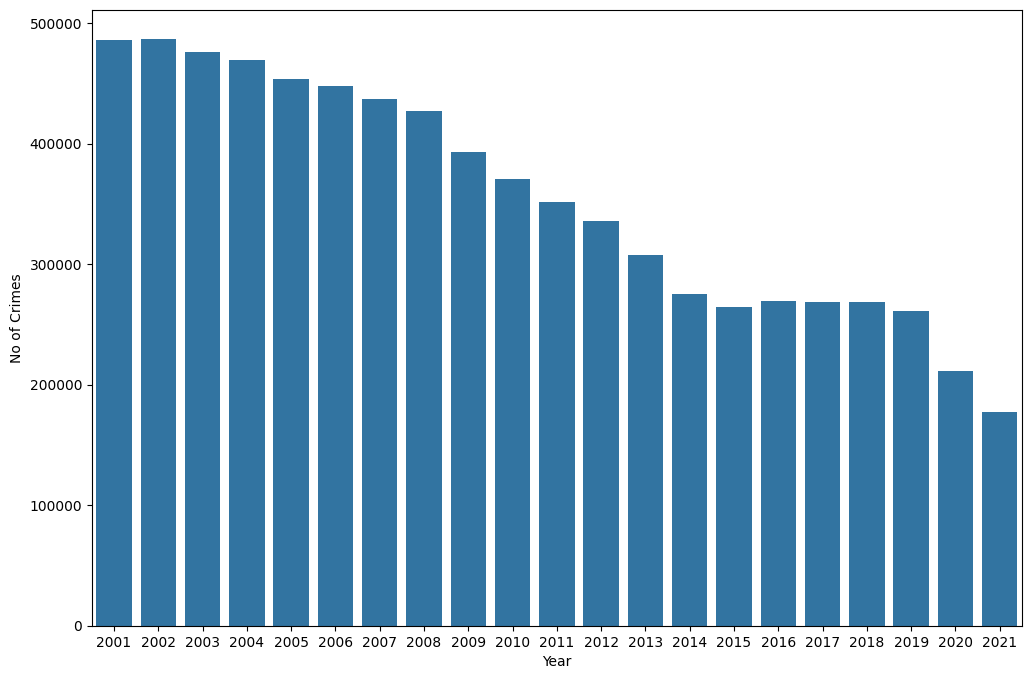

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

# fig = px.bar(
#     dataFrame,
#     x='Year',
#     y='Year',
#     title='Number of Crimes by Year',
#     width=800,  # Set a specific width for better visualization
#     height=800   # Set a specific height for better visualization
# )

# # Set a more descriptive y-axis label
# fig.update_layout(yaxis_title='Number of Crimes')

# fig.show()

In [15]:
# Since we do not have crimes in starting years so we drop them 2020
# selecting the dataset which starts from 2015
dataFrame=dataFrame[dataFrame['Year']>=2015]
dataFrame=dataFrame[dataFrame['Year']<2020]
dataFrame

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1.138875e+06,1.904869e+06,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,1.152037e+06,1.920384e+06,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439336,12544628,07/23/2016 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,APARTMENT,False,False,933,9.0,20.0,61.0,1.164566e+06,1.885734e+06,2016,41.842049,-87.671624,"(41.976290414, -87.905227221)"
7439402,12544308,01/08/2018 12:00:00 AM,DECEPTIVE PRACTICE,SCHOOL - PUBLIC BUILDING,False,False,2525,25.0,35.0,22.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
7439472,12544819,01/08/2016 12:00:00 AM,DECEPTIVE PRACTICE,RESIDENCE,False,False,523,5.0,34.0,53.0,1.164566e+06,1.885734e+06,2016,41.842049,-87.671624,"(41.976290414, -87.905227221)"
7439539,12544581,01/28/2017 12:00:00 AM,DECEPTIVE PRACTICE,RESIDENCE,False,True,1623,16.0,45.0,12.0,1.164566e+06,1.885734e+06,2017,41.842049,-87.671624,"(41.976290414, -87.905227221)"


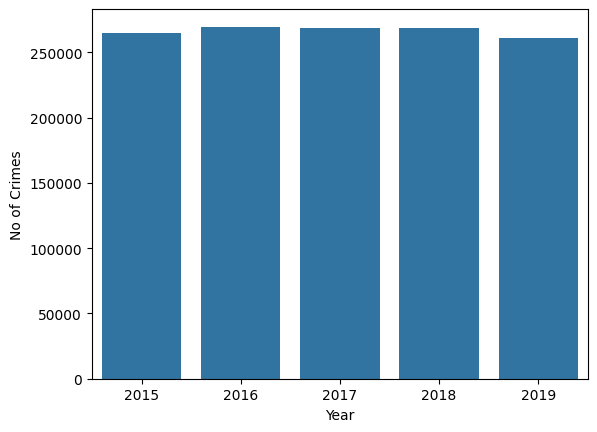

In [16]:
sns.countplot(x='Year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

In [18]:
# # listing the crimes type wise with their counts
types=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
types

Primary Type
THEFT                                311070
BATTERY                              247782
CRIMINAL DAMAGE                      143241
ASSAULT                               96117
DECEPTIVE PRACTICE                    93654
OTHER OFFENSE                         86158
NARCOTICS                             77583
BURGLARY                              61857
MOTOR VEHICLE THEFT                   51693
ROBBERY                               51151
CRIMINAL TRESPASS                     33247
WEAPONS VIOLATION                     23295
OFFENSE INVOLVING CHILDREN            11874
PUBLIC PEACE VIOLATION                 8419
CRIM SEXUAL ASSAULT                    6761
INTERFERENCE WITH PUBLIC OFFICER       6183
SEX OFFENSE                            5622
PROSTITUTION                           4255
HOMICIDE                               3070
ARSON                                  2161
CRIMINAL SEXUAL ASSAULT                1254
LIQUOR LAW VIOLATION                   1210
GAMBLING           

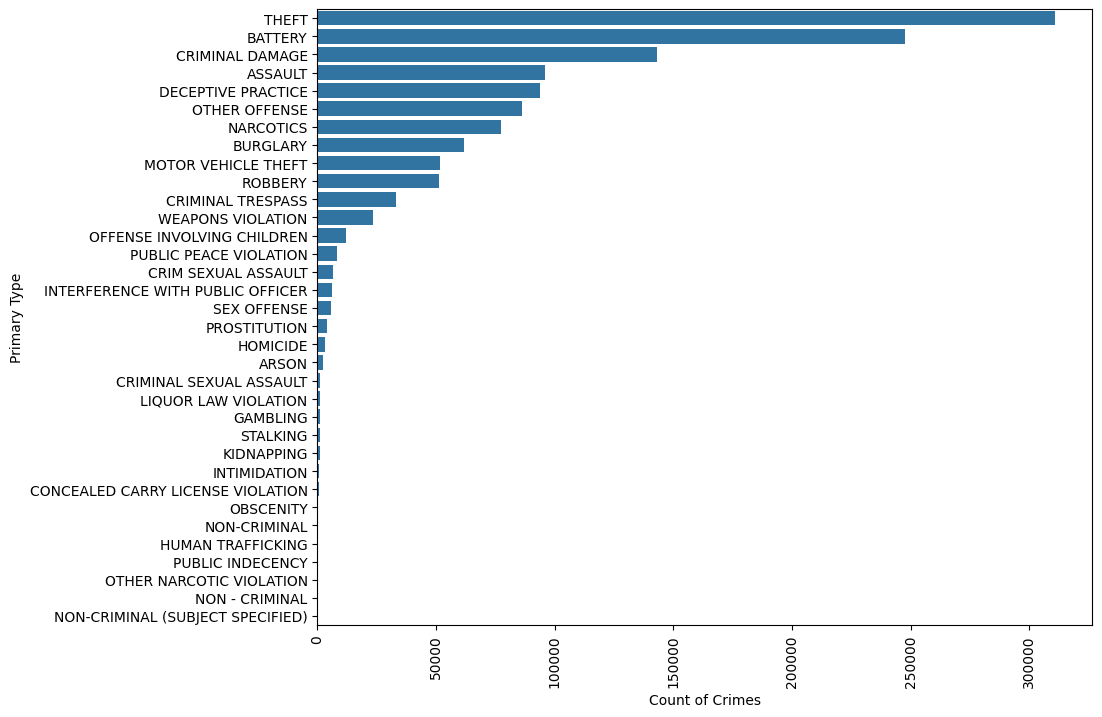

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataFrame, y="Primary Type", order=dataFrame['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Count of Crimes')
plt.show()

In [21]:
fourMajorTypes=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
fourMajorTypes=fourMajorTypes[:4]
fourMajorTypes

Primary Type
THEFT              311070
BATTERY            247782
CRIMINAL DAMAGE    143241
ASSAULT             96117
Name: count, dtype: int64

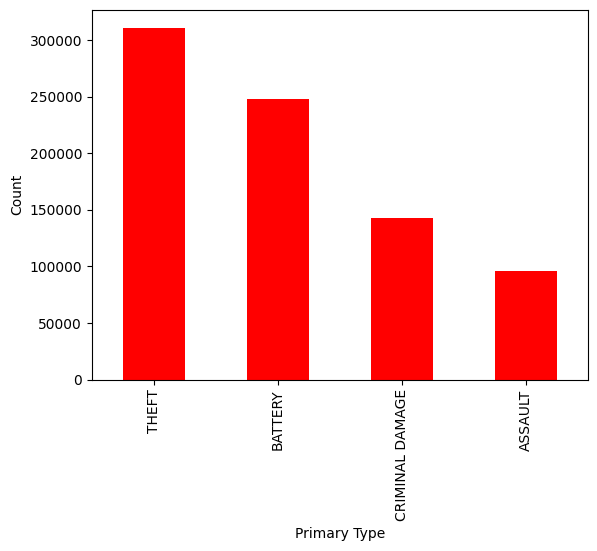

In [22]:
fourMajorTypes.plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

In [23]:
#Plotly library for above graphs 

In [24]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']


# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [25]:
# selecting the data form our dataset that belongs major crime classes
crime_df = dataFrame.loc[dataFrame['Primary Type'] .isin(major_crimes)]
crime_df

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1.138875e+06,1.904869e+06,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,10224744,09/05/2015 01:00:00 PM,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,1.159734e+06,1.889313e+06,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434844,10253256,09/06/2015 09:00:00 AM,THEFT,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)"
7437300,11840858,09/25/2019 06:48:00 PM,BATTERY,RESIDENCE - PORCH / HALLWAY,False,False,414,4.0,7.0,43.0,1.193209e+06,1.854177e+06,2019,41.754819,-87.567508,"(41.754818964, -87.56750785)"
7437301,11914503,12/07/2019 12:49:00 PM,BATTERY,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)"
7437984,11451754,09/19/2018 09:08:00 PM,BATTERY,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)"


In [26]:
loc=crime_df['Location Description'].value_counts().sort_values(ascending=False)
loc=loc[:20]
loc

Location Description
STREET                            175132
RESIDENCE                         116657
APARTMENT                         113866
SIDEWALK                           59585
OTHER                              28676
PARKING LOT/GARAGE(NON.RESID.)     26870
SMALL RETAIL STORE                 24181
RESTAURANT                         21781
RESIDENCE PORCH/HALLWAY            18776
DEPARTMENT STORE                   18608
RESIDENTIAL YARD (FRONT/BACK)      18429
VEHICLE NON-COMMERCIAL             14938
SCHOOL, PUBLIC, BUILDING           13714
GROCERY FOOD STORE                 13432
ALLEY                              12100
RESIDENCE-GARAGE                    9263
GAS STATION                         9013
BAR OR TAVERN                       8154
CTA TRAIN                           6784
PARK PROPERTY                       6644
Name: count, dtype: int64

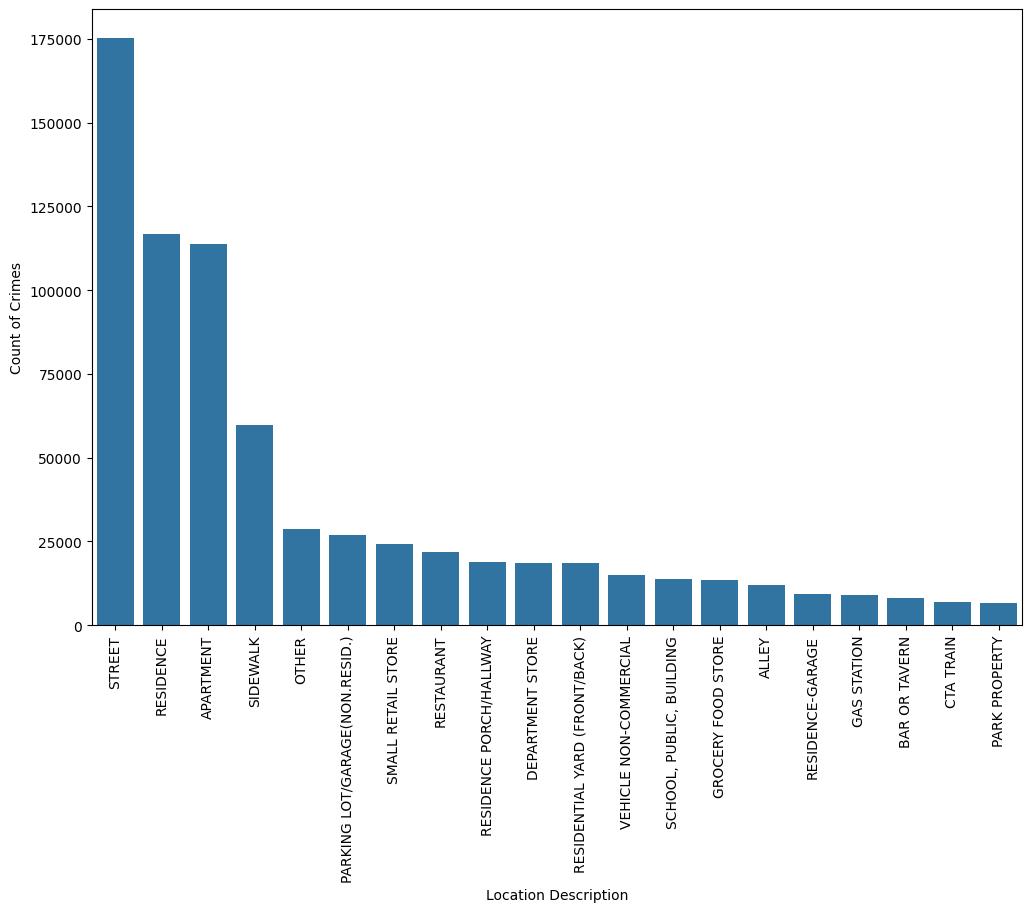

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data=crime_df, x="Location Description", order=loc.index)
plt.xticks(rotation='vertical')
plt.ylabel('Count of Crimes')
plt.show()

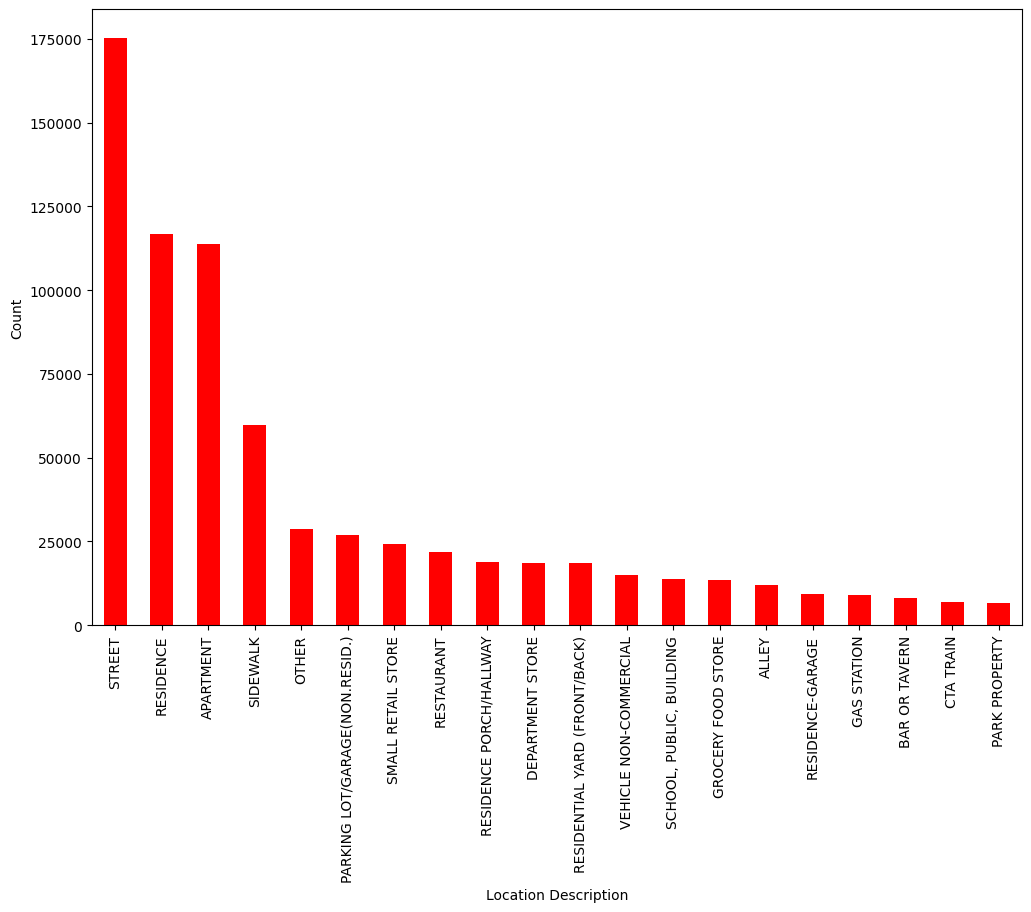

In [28]:
plt.figure(figsize=(12,8))
loc.plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

In [29]:
# storing four major 4 locations
major_loc = ['STREET','RESIDENCE', 'APARTMENT','SIDEWALK']

In [30]:
# selecting the data form our dataset that belongs major locations
crime_df = crime_df.loc[crime_df['Location Description'] .isin(major_loc)]
crime_df

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,09/05/2015 12:50:00 PM,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,09/03/2015 01:00:00 PM,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1.162574e+06,1.909428e+06,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434220,11740646,06/30/2019 01:00:00 AM,BATTERY,STREET,False,False,1823,18.0,27.0,8.0,1.172522e+06,1.906020e+06,2019,41.897561,-87.641790,"(41.897561222, -87.641789891)"
7434844,10253256,09/06/2015 09:00:00 AM,THEFT,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)"
7437301,11914503,12/07/2019 12:49:00 PM,BATTERY,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)"
7437984,11451754,09/19/2018 09:08:00 PM,BATTERY,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)"


In [31]:
graphDF=crime_df.copy()
graphDF

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,09/05/2015 12:50:00 PM,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,09/03/2015 01:00:00 PM,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1.162574e+06,1.909428e+06,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434220,11740646,06/30/2019 01:00:00 AM,BATTERY,STREET,False,False,1823,18.0,27.0,8.0,1.172522e+06,1.906020e+06,2019,41.897561,-87.641790,"(41.897561222, -87.641789891)"
7434844,10253256,09/06/2015 09:00:00 AM,THEFT,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)"
7437301,11914503,12/07/2019 12:49:00 PM,BATTERY,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)"
7437984,11451754,09/19/2018 09:08:00 PM,BATTERY,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)"


In [32]:
graphDF['Date'] = pd.to_datetime(graphDF['Date'])
graphDF

C:\Users\Darsi Gangothri\AppData\Local\Temp\ipykernel_6012\30015118.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  graphDF['Date'] = pd.to_datetime(graphDF['Date'])


,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2,11646166,2018-09-01 00:01:00,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)"
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,2015-09-03 13:00:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1.162574e+06,1.909428e+06,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434220,11740646,2019-06-30 01:00:00,BATTERY,STREET,False,False,1823,18.0,27.0,8.0,1.172522e+06,1.906020e+06,2019,41.897561,-87.641790,"(41.897561222, -87.641789891)"
7434844,10253256,2015-09-06 09:00:00,THEFT,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)"
7437301,11914503,2019-12-07 12:49:00,BATTERY,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)"
7437984,11451754,2018-09-19 21:08:00,BATTERY,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)"


In [34]:
graphDF['Date'] = pd.to_datetime(graphDF['Date'],format='%m/%d/%Y %I:%M:%S %p')
graphDF['Date']

0         2015-09-05 13:30:00
2         2018-09-01 00:01:00
4         2015-09-05 13:00:00
13        2015-09-05 12:50:00
14        2015-09-03 13:00:00
                  ...        
7434220   2019-06-30 01:00:00
7434844   2015-09-06 09:00:00
7437301   2019-12-07 12:49:00
7437984   2018-09-19 21:08:00
7438641   2018-11-01 00:00:00
Name: Date, Length: 465240, dtype: datetime64[ns]

In [35]:
import calendar
graphDF['Month']=(graphDF['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
graphDF.head(4)

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep
2,11646166,2018-09-01 00:01:00,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)",Sep
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep


In [36]:
# storing the categories of months
graphDF['Month'] = pd.Categorical(graphDF['Month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

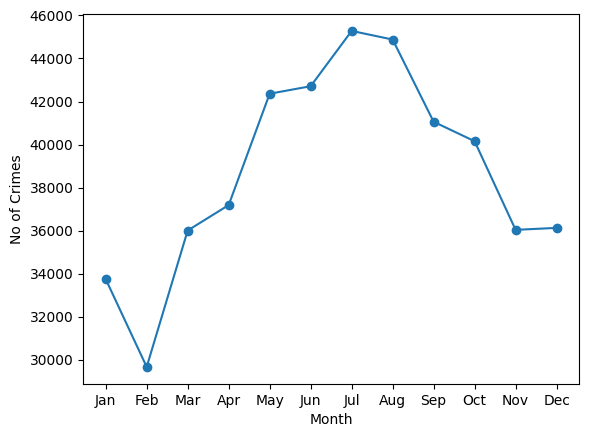

In [37]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
graphDF.groupby('Month')['ID'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

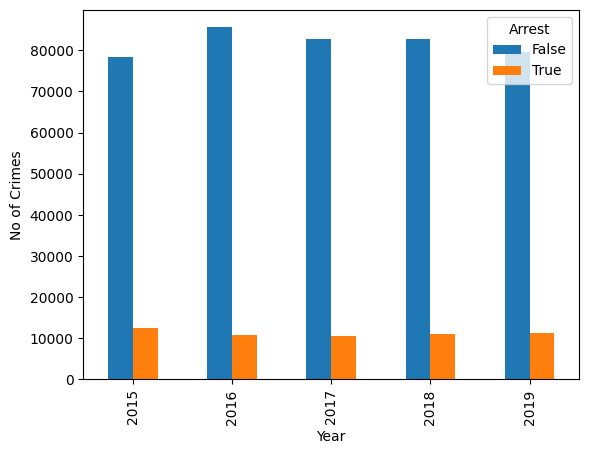

In [38]:
graphDF.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()

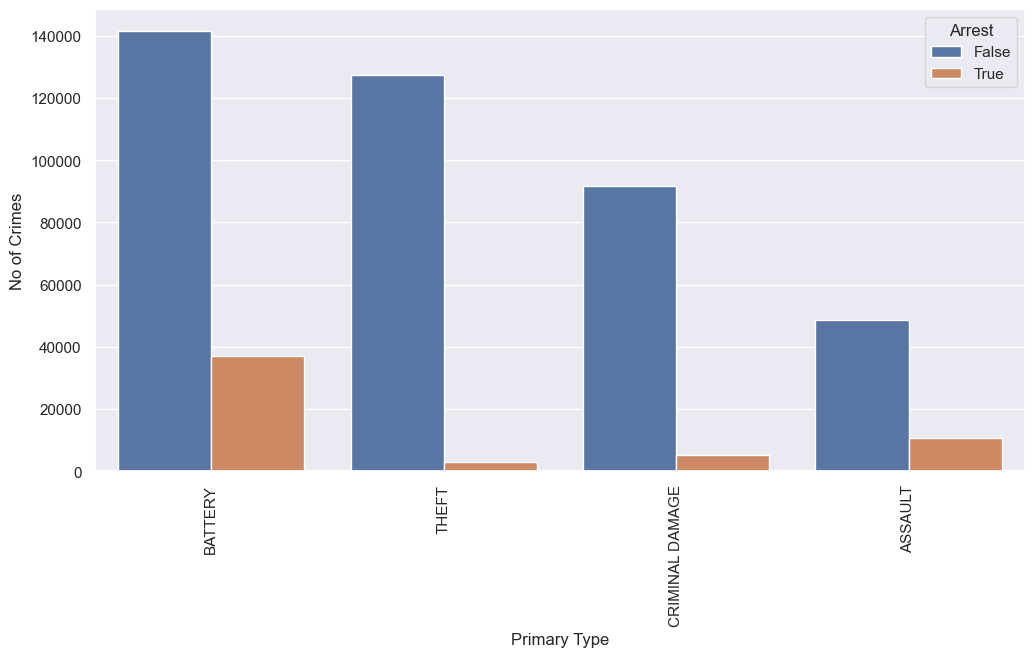

In [39]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=graphDF,order=graphDF['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [40]:
temp=graphDF.copy()
temp

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep
2,11646166,2018-09-01 00:01:00,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)",Sep
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep
14,10224752,2015-09-03 13:00:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1.162574e+06,1.909428e+06,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434220,11740646,2019-06-30 01:00:00,BATTERY,STREET,False,False,1823,18.0,27.0,8.0,1.172522e+06,1.906020e+06,2019,41.897561,-87.641790,"(41.897561222, -87.641789891)",Jun
7434844,10253256,2015-09-06 09:00:00,THEFT,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)",Sep
7437301,11914503,2019-12-07 12:49:00,BATTERY,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)",Dec
7437984,11451754,2018-09-19 21:08:00,BATTERY,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)",Sep


In [46]:
def crime_type(t):
    if t =='THEFT': return '0'
    elif t =='BATTERY': return '1'
    elif t =='CRIMINAL DAMAGE': return '2'
    elif t == 'ASSAULT': return '3'
    else: return '-1'

In [47]:
# cp_crime = crime_df.copy()
temp['crimeType'] = temp['Primary Type'].map(crime_type)
temp=temp.drop(columns='Primary Type')
temp

KeyError: 'Primary Type'

In [48]:
# temp.dropna()
temp.dropna(inplace=True)
temp

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10224738,2015-09-05 13:30:00,RESIDENCE,False,True,924,9.0,12.0,61.0,1.165074e+06,1.875917e+06,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep,1
2,11646166,2018-09-01 00:01:00,RESIDENCE,False,True,631,6.0,8.0,44.0,1.164566e+06,1.885734e+06,2018,41.842049,-87.671624,"(41.976290414, -87.905227221)",Sep,0
4,10224741,2015-09-05 13:00:00,APARTMENT,False,True,1522,15.0,28.0,25.0,1.141706e+06,1.900086e+06,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep,3
13,10224751,2015-09-05 12:50:00,STREET,False,True,222,2.0,4.0,39.0,1.185907e+06,1.874105e+06,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep,1
14,10224752,2015-09-03 13:00:00,STREET,False,False,1424,14.0,1.0,24.0,1.162574e+06,1.909428e+06,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434220,11740646,2019-06-30 01:00:00,STREET,False,False,1823,18.0,27.0,8.0,1.172522e+06,1.906020e+06,2019,41.897561,-87.641790,"(41.897561222, -87.641789891)",Jun,1
7434844,10253256,2015-09-06 09:00:00,RESIDENCE,False,False,1532,15.0,37.0,25.0,1.142927e+06,1.903345e+06,2015,41.890824,-87.750556,"(41.89082387, -87.75055633)",Sep,0
7437301,11914503,2019-12-07 12:49:00,SIDEWALK,True,False,931,9.0,20.0,61.0,1.166056e+06,1.872220e+06,2019,41.804951,-87.666503,"(41.804951438, -87.666502657)",Dec,1
7437984,11451754,2018-09-19 21:08:00,STREET,False,False,131,1.0,3.0,33.0,1.176766e+06,1.889757e+06,2018,41.852840,-87.626694,"(41.852839662, -87.626694117)",Sep,1


In [49]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [50]:
# values according to their class count
count=temp['crimeType'].value_counts().sort_values(ascending=False)
count

crimeType
1    178701
0    130608
2     96794
3     59137
Name: count, dtype: int64

In [51]:
# getting the portion of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

155080

In [52]:
first=temp.iloc[0:portion,:]
first.shape

(155080, 17)

In [53]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(155080, 17)

In [54]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(155078, 17)

In [71]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 30000)
df_frst=first.iloc[index]
df_frst.shape

(30000, 17)

In [72]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 30000)
df_scnd=scnd.iloc[index]
df_scnd

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
675940,11250388,2018-03-08 04:45:00,APARTMENT,False,False,512,5.0,9.0,50.0,1184238.0,1836191.0,2018,41.705678,-87.600944,"(41.705677782, -87.600944364)",Mar,0
531887,11131433,2017-10-27 14:20:00,STREET,False,False,612,6.0,17.0,71.0,1169977.0,1854082.0,2017,41.755094,-87.652649,"(41.755094217, -87.652648704)",Oct,0
576790,11047647,2017-08-08 15:11:00,APARTMENT,False,True,431,4.0,7.0,51.0,1190184.0,1842078.0,2017,41.721692,-87.578982,"(41.721691511, -87.578982056)",Aug,2
637448,11197693,2018-01-07 11:45:00,APARTMENT,False,False,1013,10.0,22.0,30.0,1151079.0,1888091.0,2018,41.848809,-87.721017,"(41.848809325, -87.72101749)",Jan,0
476862,10933532,2017-05-03 15:50:00,APARTMENT,False,False,2422,24.0,49.0,1.0,1164304.0,1949913.0,2017,42.018183,-87.670727,"(42.018183391, -87.670726955)",May,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536601,11137844,2017-11-02 16:30:00,RESIDENCE,False,True,612,6.0,17.0,71.0,1170674.0,1852835.0,2017,41.751657,-87.650131,"(41.751657125, -87.650130681)",Nov,1
883005,11452916,2018-09-20 23:30:00,SIDEWALK,True,False,423,4.0,7.0,46.0,1195113.0,1850446.0,2018,41.744534,-87.560653,"(41.744534088, -87.560653171)",Sep,2
764525,11430868,2018-08-30 12:50:00,STREET,False,True,833,8.0,18.0,70.0,1153039.0,1853418.0,2018,41.753623,-87.714740,"(41.753623074, -87.714739868)",Aug,1
886252,11457129,2018-09-24 20:00:00,STREET,False,False,1622,16.0,45.0,11.0,1135870.0,1939401.0,2018,41.989894,-87.775612,"(41.989893986, -87.775612025)",Sep,0


In [76]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 30000)
df_third=third.iloc[index]
df_third

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
1601092,10137359,2015-07-02 19:00:00,STREET,False,False,1011,10.0,24.0,29.0,1149463.0,1894398.0,2015,41.866148,-87.726785,"(41.866147972, -87.726784885)",Jul,0
4077957,10013234,2015-03-29 03:00:00,APARTMENT,False,True,1421,14.0,35.0,22.0,1156523.0,1912190.0,2015,41.914831,-87.700385,"(41.914831072, -87.700385113)",Mar,1
4700435,10037706,2015-04-18 14:15:00,SIDEWALK,False,False,1122,11.0,28.0,26.0,1150223.0,1899725.0,2015,41.880751,-87.723856,"(41.880751096, -87.723855981)",Apr,1
932452,11519371,2018-11-28 12:35:00,RESIDENCE,False,True,1131,11.0,28.0,26.0,1147578.0,1897671.0,2018,41.875166,-87.733621,"(41.875165815, -87.733620994)",Nov,1
7268040,10717423,2016-10-15 23:00:00,STREET,False,False,1215,12.0,27.0,28.0,1167387.0,1901671.0,2016,41.885739,-87.660775,"(41.885739288, -87.660775234)",Oct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064589,11866019,2019-10-05 12:00:00,RESIDENCE,False,False,513,5.0,34.0,49.0,1176447.0,1833983.0,2019,41.699797,-87.629540,"(41.699797001, -87.629540249)",Oct,0
6819636,11824067,2019-09-08 19:30:00,STREET,False,False,332,3.0,5.0,43.0,1187566.0,1859859.0,2019,41.770547,-87.588007,"(41.770546861, -87.588007065)",Sep,0
1065841,10070767,2015-05-13 22:30:00,STREET,False,False,1112,11.0,27.0,23.0,1149903.0,1905335.0,2015,41.896152,-87.724885,"(41.896151765, -87.724884939)",May,0
941240,11531093,2018-12-10 14:00:00,STREET,False,False,634,6.0,21.0,44.0,1177466.0,1846940.0,2018,41.735330,-87.625419,"(41.735329834, -87.625419019)",Dec,2


In [77]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10872267,2017-03-08 16:00:00,STREET,False,False,413,4.0,7.0,48.0,1192728.0,1846092.0,2017,41.732645,-87.569534,"(41.732644758, -87.569533532)",Mar,0
1,10415234,2016-02-15 09:50:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1174610.0,1842907.0,2016,41.724327,-87.636002,"(41.724326728, -87.636001921)",Feb,3
2,10829560,2017-01-25 15:13:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1173245.0,1844183.0,2017,41.727858,-87.640964,"(41.727858483, -87.640964276)",Jan,0
3,10394516,2016-01-27 00:00:00,APARTMENT,False,False,533,5.0,9.0,54.0,1184379.0,1818785.0,2016,41.657910,-87.600970,"(41.657910058, -87.60096985)",Jan,0
4,10584376,2016-07-03 17:20:00,RESIDENCE,False,True,725,7.0,15.0,67.0,1165776.0,1861958.0,2016,41.776797,-87.667821,"(41.776797204, -87.667820924)",Jul,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,11866019,2019-10-05 12:00:00,RESIDENCE,False,False,513,5.0,34.0,49.0,1176447.0,1833983.0,2019,41.699797,-87.629540,"(41.699797001, -87.629540249)",Oct,0
89996,11824067,2019-09-08 19:30:00,STREET,False,False,332,3.0,5.0,43.0,1187566.0,1859859.0,2019,41.770547,-87.588007,"(41.770546861, -87.588007065)",Sep,0
89997,10070767,2015-05-13 22:30:00,STREET,False,False,1112,11.0,27.0,23.0,1149903.0,1905335.0,2015,41.896152,-87.724885,"(41.896151765, -87.724884939)",May,0
89998,11531093,2018-12-10 14:00:00,STREET,False,False,634,6.0,21.0,44.0,1177466.0,1846940.0,2018,41.735330,-87.625419,"(41.735329834, -87.625419019)",Dec,2


In [78]:
df=final_df.copy()

In [79]:
from sklearn.decomposition import PCA

In [80]:
location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10872267,2017-03-08 16:00:00,STREET,False,False,413,4.0,7.0,48.0,1192728.0,1846092.0,2017,41.732645,-87.569534,-0.137904,Mar,0
1,10415234,2016-02-15 09:50:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1174610.0,1842907.0,2016,41.724327,-87.636002,-0.114530,Feb,3
2,10829560,2017-01-25 15:13:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1173245.0,1844183.0,2017,41.727858,-87.640964,-0.109103,Jan,0
3,10394516,2016-01-27 00:00:00,APARTMENT,False,False,533,5.0,9.0,54.0,1184379.0,1818785.0,2016,41.657910,-87.600970,-0.189619,Jan,0
4,10584376,2016-07-03 17:20:00,RESIDENCE,False,True,725,7.0,15.0,67.0,1165776.0,1861958.0,2016,41.776797,-87.667821,-0.053292,Jul,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,11866019,2019-10-05 12:00:00,RESIDENCE,False,False,513,5.0,34.0,49.0,1176447.0,1833983.0,2019,41.699797,-87.629540,-0.139267,Oct,0
89996,11824067,2019-09-08 19:30:00,STREET,False,False,332,3.0,5.0,43.0,1187566.0,1859859.0,2019,41.770547,-87.588007,-0.095755,Sep,0
89997,10070767,2015-05-13 22:30:00,STREET,False,False,1112,11.0,27.0,23.0,1149903.0,1905335.0,2015,41.896152,-87.724885,0.078922,May,0
89998,11531093,2018-12-10 14:00:00,STREET,False,False,634,6.0,21.0,44.0,1177466.0,1846940.0,2018,41.735330,-87.625419,-0.109671,Dec,2


In [81]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10872267,2017-03-08 16:00:00,STREET,False,False,413,4.0,7.0,48.0,1192728.0,1846092.0,2017,41.732645,-87.569534,-0.137904,Mar,0
1,10415234,2016-02-15 09:50:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1174610.0,1842907.0,2016,41.724327,-87.636002,-0.114530,Feb,3
2,10829560,2017-01-25 15:13:00,RESIDENCE,False,False,2223,22.0,21.0,73.0,1173245.0,1844183.0,2017,41.727858,-87.640964,-0.109103,Jan,0
3,10394516,2016-01-27 00:00:00,APARTMENT,False,False,533,5.0,9.0,54.0,1184379.0,1818785.0,2016,41.657910,-87.600970,-0.189619,Jan,0
4,10584376,2016-07-03 17:20:00,RESIDENCE,False,True,725,7.0,15.0,67.0,1165776.0,1861958.0,2016,41.776797,-87.667821,-0.053292,Jul,1
5,11860723,2019-10-14 14:58:00,STREET,False,False,1812,18.0,43.0,7.0,1170384.0,1913512.0,2019,41.918167,-87.649423,0.063531,Oct,0
6,10515323,2016-05-09 11:45:00,STREET,False,True,414,4.0,8.0,46.0,1193278.0,1850894.0,2016,41.745808,-87.567362,-0.127238,May,2
7,10635407,2016-08-11 13:30:00,APARTMENT,False,True,1531,15.0,37.0,25.0,1141823.0,1907039.0,2016,41.900981,-87.754519,0.096912,Aug,1
8,10872878,2017-03-09 11:35:00,STREET,False,False,1524,15.0,28.0,25.0,1141590.0,1903492.0,2017,41.891252,-87.755463,0.088723,Mar,2
9,10406570,2016-02-07 00:01:00,STREET,False,False,222,2.0,4.0,39.0,1186278.0,1872787.0,2016,41.806053,-87.592320,-0.062281,Feb,2


In [82]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10872267,STREET,False,False,413,4.0,7.0,48.0,1192728.0,1846092.0,2017,41.732645,-87.569534,-0.137904,Mar,0,3,2
1,10415234,RESIDENCE,False,False,2223,22.0,21.0,73.0,1174610.0,1842907.0,2016,41.724327,-87.636002,-0.114530,Feb,3,2,0
2,10829560,RESIDENCE,False,False,2223,22.0,21.0,73.0,1173245.0,1844183.0,2017,41.727858,-87.640964,-0.109103,Jan,0,1,2
3,10394516,APARTMENT,False,False,533,5.0,9.0,54.0,1184379.0,1818785.0,2016,41.657910,-87.600970,-0.189619,Jan,0,1,2
4,10584376,RESIDENCE,False,True,725,7.0,15.0,67.0,1165776.0,1861958.0,2016,41.776797,-87.667821,-0.053292,Jul,1,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,11866019,RESIDENCE,False,False,513,5.0,34.0,49.0,1176447.0,1833983.0,2019,41.699797,-87.629540,-0.139267,Oct,0,10,5
89996,11824067,STREET,False,False,332,3.0,5.0,43.0,1187566.0,1859859.0,2019,41.770547,-87.588007,-0.095755,Sep,0,9,6
89997,10070767,STREET,False,False,1112,11.0,27.0,23.0,1149903.0,1905335.0,2015,41.896152,-87.724885,0.078922,May,0,5,2
89998,11531093,STREET,False,False,634,6.0,21.0,44.0,1177466.0,1846940.0,2018,41.735330,-87.625419,-0.109671,Dec,2,12,0


In [83]:
cp_crime = df.copy()

# encoding our column with labels to nos
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['Location Description']] = scaler.fit_transform(cp_crime[['Location Description']]) #as we have already converted using LabelEncoder check it
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10872267,1.000000,0,0,0.124587,4.0,7.0,48.0,0.887913,0.233838,2017,41.732645,-87.569534,-0.137904,Mar,0,3,2
1,10415234,0.333333,0,0,0.871287,22.0,21.0,73.0,0.723993,0.210696,2016,41.724327,-87.636002,-0.114530,Feb,3,2,0
2,10829560,0.333333,0,0,0.871287,22.0,21.0,73.0,0.711644,0.219967,2017,41.727858,-87.640964,-0.109103,Jan,0,1,2
3,10394516,0.000000,0,0,0.174092,5.0,9.0,54.0,0.812377,0.035422,2016,41.657910,-87.600970,-0.189619,Jan,0,1,2
4,10584376,0.333333,0,1,0.253300,7.0,15.0,67.0,0.644069,0.349123,2016,41.776797,-87.667821,-0.053292,Jul,1,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,11866019,0.333333,0,0,0.165842,5.0,34.0,49.0,0.740613,0.145853,2019,41.699797,-87.629540,-0.139267,Oct,0,10,5
89996,11824067,1.000000,0,0,0.091172,3.0,5.0,43.0,0.841211,0.333871,2019,41.770547,-87.588007,-0.095755,Sep,0,9,6
89997,10070767,1.000000,0,0,0.412954,11.0,27.0,23.0,0.500461,0.664305,2015,41.896152,-87.724885,0.078922,May,0,5,2
89998,11531093,1.000000,0,0,0.215759,6.0,21.0,44.0,0.749833,0.240000,2018,41.735330,-87.625419,-0.109671,Dec,2,12,0


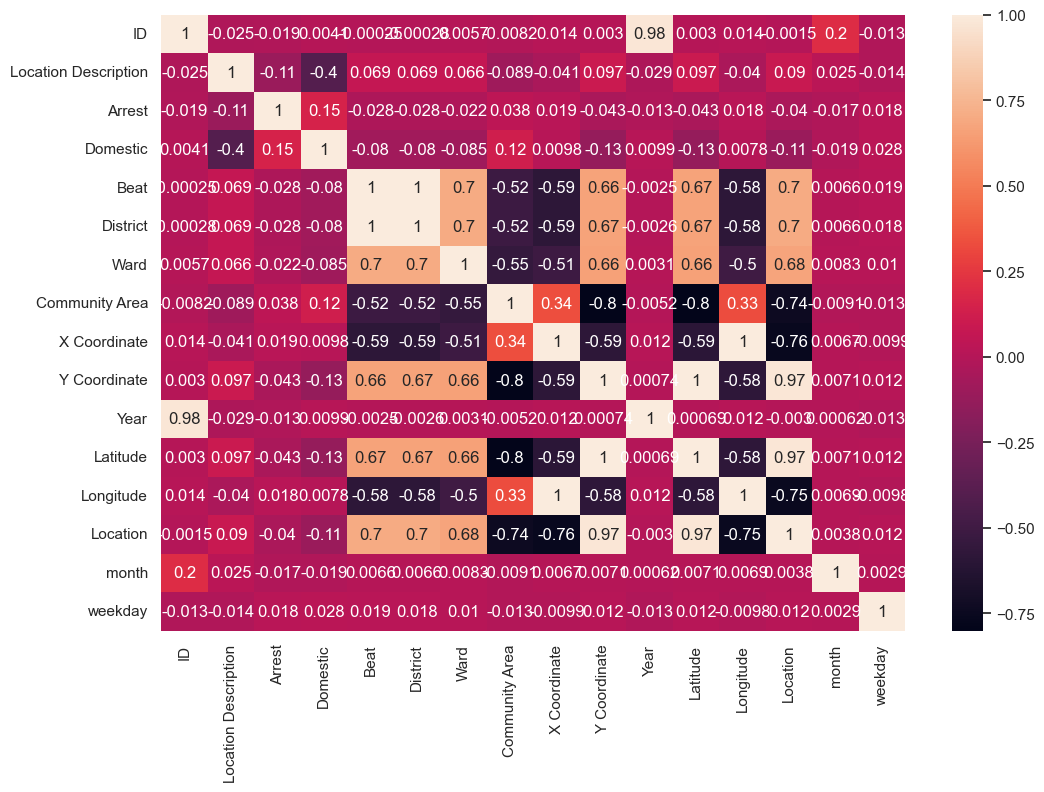

In [84]:
numeric_columns = cp_crime.select_dtypes(include=[np.number]).columns
corelation = cp_crime[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True)
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude
# 'Beat'
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','X Coordinate','Y Coordinate','Year'] 
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [85]:
selected_cols

['Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'Ward',
 'X Coordinate',
 'Y Coordinate',
 'Year']

In [86]:
from collections import Counter
counter=Counter(Y)

# before oversampling
print(Counter(Y))

# Total classes
np.unique(Y)

Counter({'1': 34650, '0': 25224, '2': 18763, '3': 11363})


array(['0', '1', '2', '3'], dtype=object)

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
# # oversampling using SMOTE
# oversample= SMOTE()
# X,Y = oversample.fit_resample(X,Y)

# # After overSampling
# print(Counter(Y))
# Y.isna().any(axis=0).sum()
# Y=Y.astype(int)
# Y.dtype
# for c in selected_cols:
#     print(f'{c}:{len(cp_crime[c].unique())}')
# sns.set_theme(style="whitegrid")
# #dropping domestic, x coordinate and y coordinate on the basis of correlation map
# selected_cols=['Location Description','Arrest','Beat','Ward','Community Area','Year','Location']      
# sns.boxplot(x=cp_crime['Location Description'])
# plt.show()
# sns.boxplot(x=cp_crime['Beat'])
# plt.show()
# sns.boxplot(x=cp_crime['Ward'])
# plt.show()
# sns.boxplot(x=cp_crime['Community Area'])
# plt.show()
# sns.boxplot(x=cp_crime['Year'])
# plt.show()
# sns.boxplot(x=cp_crime['Location'])
# plt.show()

# oversampling using SMOTE
oversample= SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [89]:
# After overSampling
print(Counter(Y))

Counter({'0': 34650, '3': 34650, '1': 34650, '2': 34650})


In [90]:
X

,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year
0,1.000000,0,0,0.124587,7.0,0.887913,0.233838,2017
1,0.333333,0,0,0.871287,21.0,0.723993,0.210696,2016
2,0.333333,0,0,0.871287,21.0,0.711644,0.219967,2017
3,0.000000,0,0,0.174092,9.0,0.812377,0.035422,2016
4,0.333333,0,1,0.253300,15.0,0.644069,0.349123,2016
...,...,...,...,...,...,...,...,...
138595,0.333333,0,0,0.248350,16.0,0.656191,0.387215,2019
138596,0.333333,0,1,0.415075,28.0,0.489815,0.624407,2015
138597,0.000000,0,1,0.784653,48.0,0.647031,0.904818,2015
138598,0.333333,0,1,0.563494,33.0,0.556258,0.783378,2016


In [91]:
Y.isna().any(axis=0).sum()

0

In [92]:
Y=Y.astype(int)
Y.dtype

dtype('int32')

In [93]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')

Location Description:4
Arrest:2
Domestic:2
Beat:272
Ward:51
X Coordinate:36796
Y Coordinate:46106
Year:5


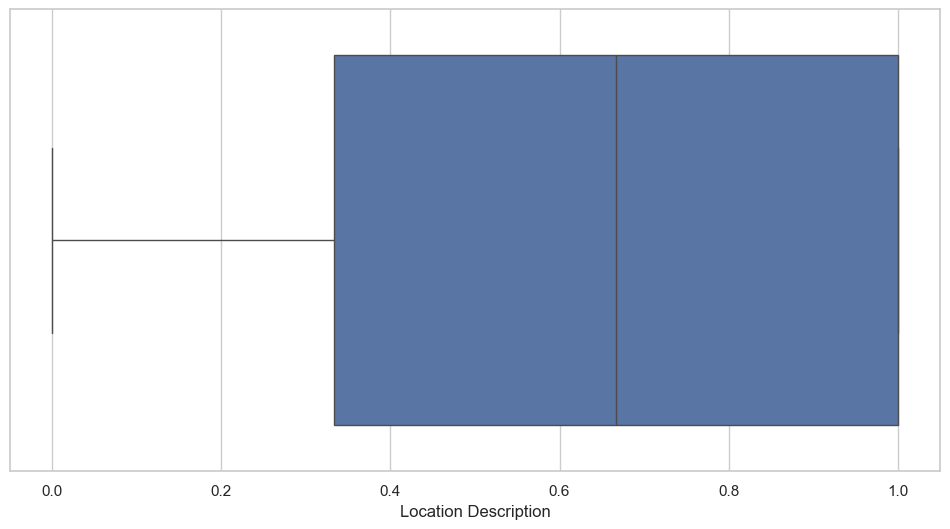

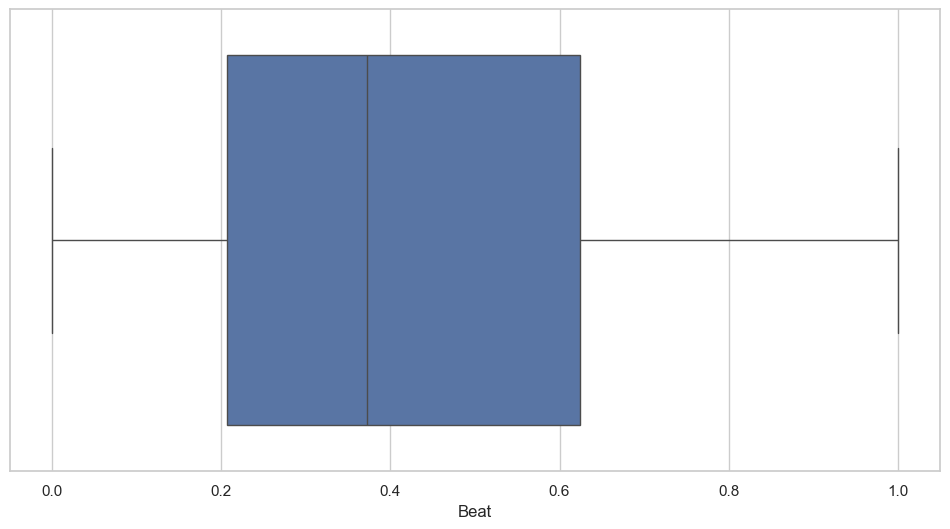

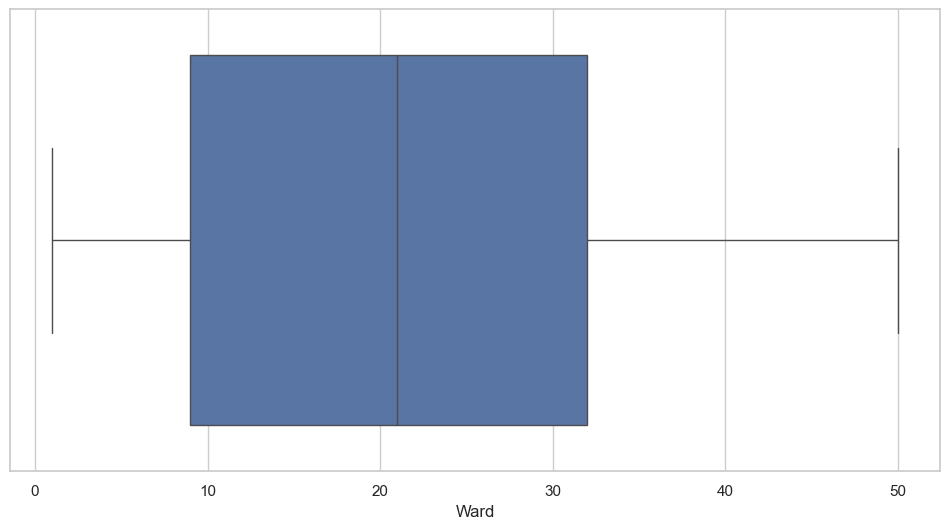

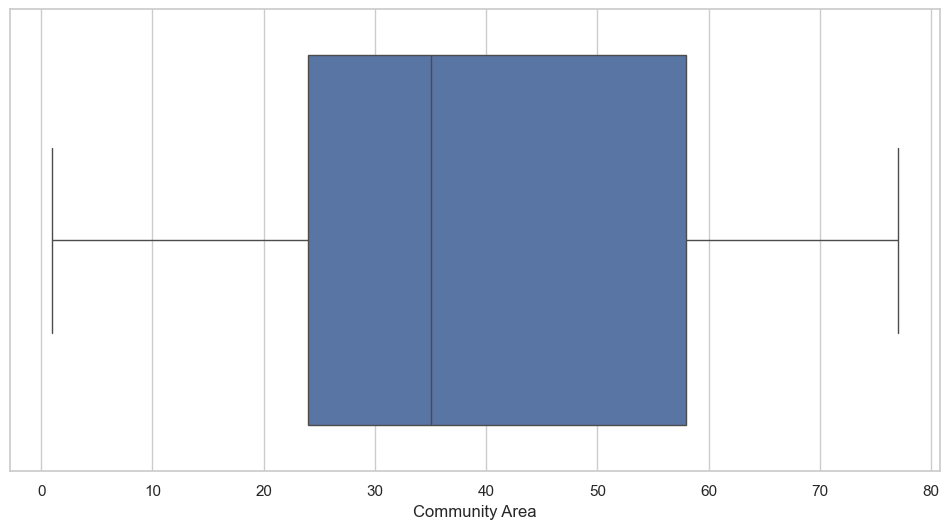

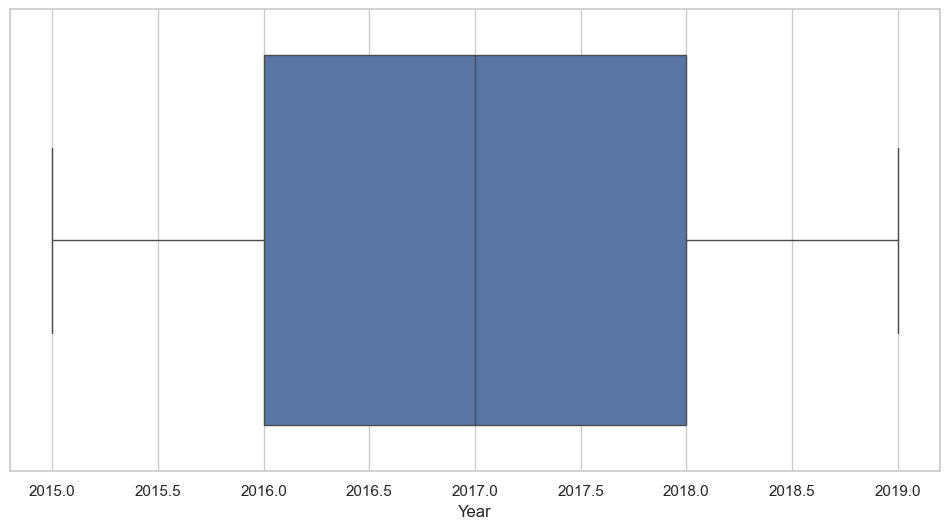

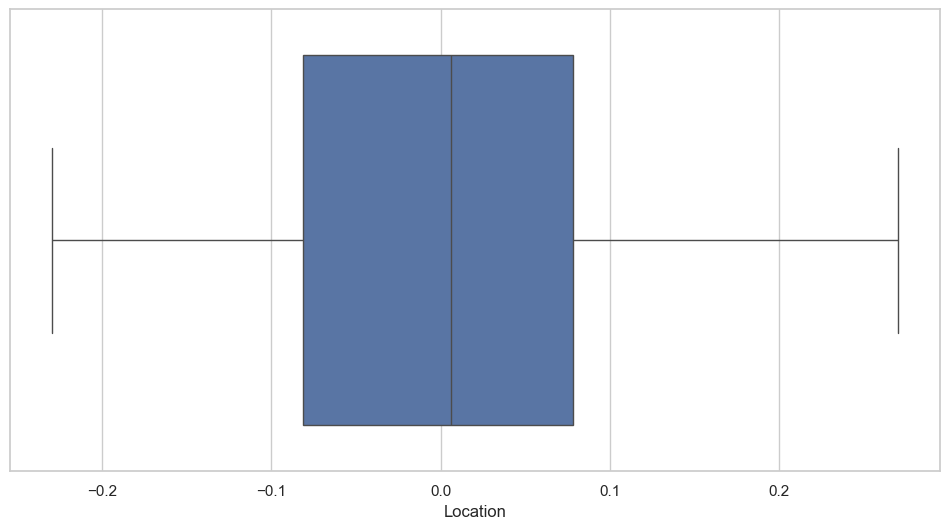

In [94]:
sns.set_theme(style="whitegrid")
#dropping domestic, x coordinate and y coordinate on the basis of correlation map
selected_cols=['Location Description','Arrest','Beat','Ward','Community Area','Year','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()

# Tarining and testing

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2, random_state=0)

### Models used
##### 1- Naive Bayes
##### 2- Random Forest

In [97]:
from sklearn.metrics import classification_report

In [98]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [99]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
}

### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_labels = gnb.predict(X_test)

# Use score method to get accuracy of the model
print('--------------------------------------------------------')
score = gnb.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  0.40974025974025974
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.85      0.51      6965
           1       0.51      0.61      0.55      6950
           2       0.39      0.10      0.16      6913
           3       0.41      0.08      0.13      6892

    accuracy                           0.41     27720
   macro avg       0.42      0.41      0.34     27720
weighted avg       0.42      0.41      0.34     27720

Accuracy of Naive Bayes 0.40974025974025974


### Categoric Naive Bayes

In [101]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB(min_categories=4)
cnb.fit(X_train,y_train)
pred_labels = cnb.predict(X_test)
print('--------------------------------------------------------')
score = cnb.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
print('Accuracy of Categoric Naive Byaes', cnb.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  0.4261544011544012
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.52      0.49      6965
           1       0.51      0.59      0.55      6950
           2       0.37      0.32      0.34      6913
           3       0.32      0.27      0.29      6892

    accuracy                           0.43     27720
   macro avg       0.42      0.43      0.42     27720
weighted avg       0.42      0.43      0.42     27720

Accuracy of Categoric Naive Byaes 0.4261544011544012


In [102]:
error_rate = []

krange = range(1,10,1)
for i in krange:
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) 
    knn.fit(X_train,y_train)
    predicted_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(' Neighbours  ',i)
    print('Test accuracy ', metrics.accuracy_score(y_train, predicted_train))
    print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

 Neighbours   1
Test accuracy  0.9911886724386725
Accuracy  0.569949494949495
 Neighbours   2
Test accuracy  0.7861922799422799
Accuracy  0.521969696969697
 Neighbours   3
Test accuracy  0.755275974025974
Accuracy  0.5461760461760462
 Neighbours   4
Test accuracy  0.7094155844155844
Accuracy  0.5402236652236653
 Neighbours   5
Test accuracy  0.6842803030303031
Accuracy  0.53495670995671
 Neighbours   6
Test accuracy  0.6615349927849928
Accuracy  0.5325396825396825
 Neighbours   7
Test accuracy  0.6463203463203463
Accuracy  0.5297258297258297
 Neighbours   8
Test accuracy  0.6322150072150072
Accuracy  0.5266233766233767
 Neighbours   9
Test accuracy  0.6204455266955267
Accuracy  0.5224747474747474


Text(0, 0.5, 'Error Rate')

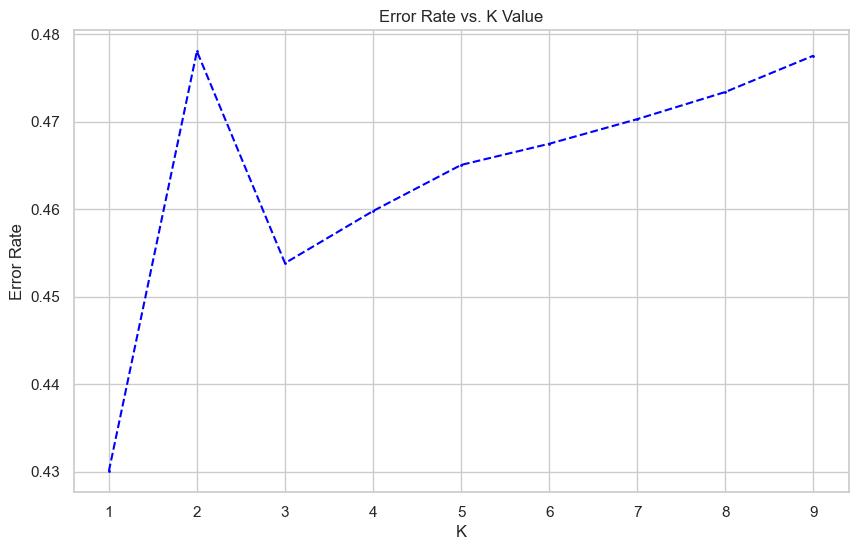

In [103]:
# elbow method to check best amount of neighbours
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# by looking at the figure at 1 error is minimum
# after that at 2 it  increases drastically than show a gradual decrease
# so we chooose K size 1

### Random Forest

In [104]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 3, ..., 0, 2, 2])

In [105]:
 # metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

pred_train = clf.predict(X_train)
pred_i = clf.predict(X_test)
print('--------------------------------------------------------')
print(' Random Forest Report ')
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))


ACCURACY OF THE MODEL:  0.6006493506493507
--------------------------------------------------------
 Random Forest Report 
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      6965
           1       0.60      0.63      0.61      6950
           2       0.57      0.56      0.56      6913
           3       0.65      0.64      0.65      6892

    accuracy                           0.60     27720
   macro avg       0.60      0.60      0.60     27720
weighted avg       0.60      0.60      0.60     27720



## Using Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
# Naive Bayes
score=cross_val_score(gnb,X_train, y_train,cv=10)
score
print('Naive Bayes Using Cross Validation: ',score.mean())

Naive Bayes Using Cross Validation:  0.41007395382395384


In [89]:
# Random Forest
score=cross_val_score(clf,X_train, y_train,cv=10)
score
print('Random Forest Using Cross Validation: ',score.mean())

Random Forest Using Cross Validation:  0.5879789155061542


In [108]:
def get_crime_type(crime):
    if crime == 0: return 'THEFT'
    elif crime == 1: return 'BATTERY'
    elif crime == 2: return 'CRIMINAL DAMAGE'
    elif crime == 3: return 'ASSAULT'
    else: return 'Other type'

In [ ]:
# dump our data
joblib.dump(clf, 'crimecast_location_based.pkl', compress=9)

In [130]:
# model_to_save = clf

# # Save the model to a file using pickle
# with open('less_data.pkl', 'wb') as file:
#     pickle.dump(model_to_save, file,protocol=pickle.HIGHEST_PROTOCOL)

In [131]:
loaded_data = joblib.load('crimecast_location_based.pkl')

In [136]:
# example_data = pd.DataFrame({
#      # Replace with the actual location value
#     'X Coordinate': [34.5678],
#     'Y Coordinate': [-54.23456]
# })

example_data = pd.DataFrame({
'Location Description': [1],
    'Arrest': [1],
    'Domestic': [0],
    'Beat': [1],
    'Ward': [15],
    'X Coordinate': [100.815117282],
    'Y Coordinate': [-0.669999562],
    'Year': [2024]
})

In [137]:
# Load the prediction model from the pickle file
# Make predictions using the loaded model
predictions = loaded_data.predict(example_data[['Location Description','Arrest','Domestic','Beat','Ward','X Coordinate', 'Y Coordinate','Year']])
# predictions = loaded_model.predict(example_data[['X Coordinate', 'Y Coordinate']])

# # Print or use the predictions as needed
print(predictions)
print(get_crime_type(predictions.tolist()[0]))

[2]
CRIMINAL DAMAGE
